In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

from collections import Counter

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, f1_score

def LoadData():
    rawDataset = pd.read_csv('diabetes.csv')
    return rawDataset

def Preprocess(rawDataset, threshold):

    outlierIndices = []
    features = list(rawDataset)[:-1]

    for feature in features:

        Q1 = np.percentile(rawDataset[feature], 25)
        Q3 = np.percentile(rawDataset[feature],75)
        IQR = Q3 - Q1
        outlierStep = 1.5 * IQR
        
        outlierIndices.extend(rawDataset[(rawDataset[feature] < Q1 - outlierStep) 
        | (rawDataset[feature] > Q3 + outlierStep )].index)

    outlierIndices = Counter(outlierIndices)
    outlierIndices = list(k for k, v in outlierIndices.items() if v > threshold )

    rawDataset.drop(outlierIndices, axis = 0).reset_index(drop=True)
    dataset = rawDataset.values[:,:-1]
    label = rawDataset.values[:,-1]
 
    return dataset, label

rawDataset = LoadData()
dataset, label = Preprocess(rawDataset, 1)

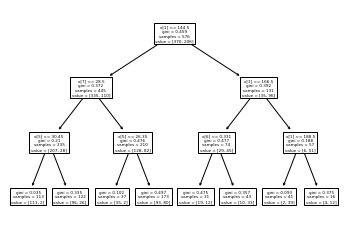

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# print(label)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, random_state=0)
# clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf = DecisionTreeClassifier(splitter = "best", max_depth=3, min_samples_leaf=10)
clf.fit(X_train, Y_train)
tree.plot_tree(clf);


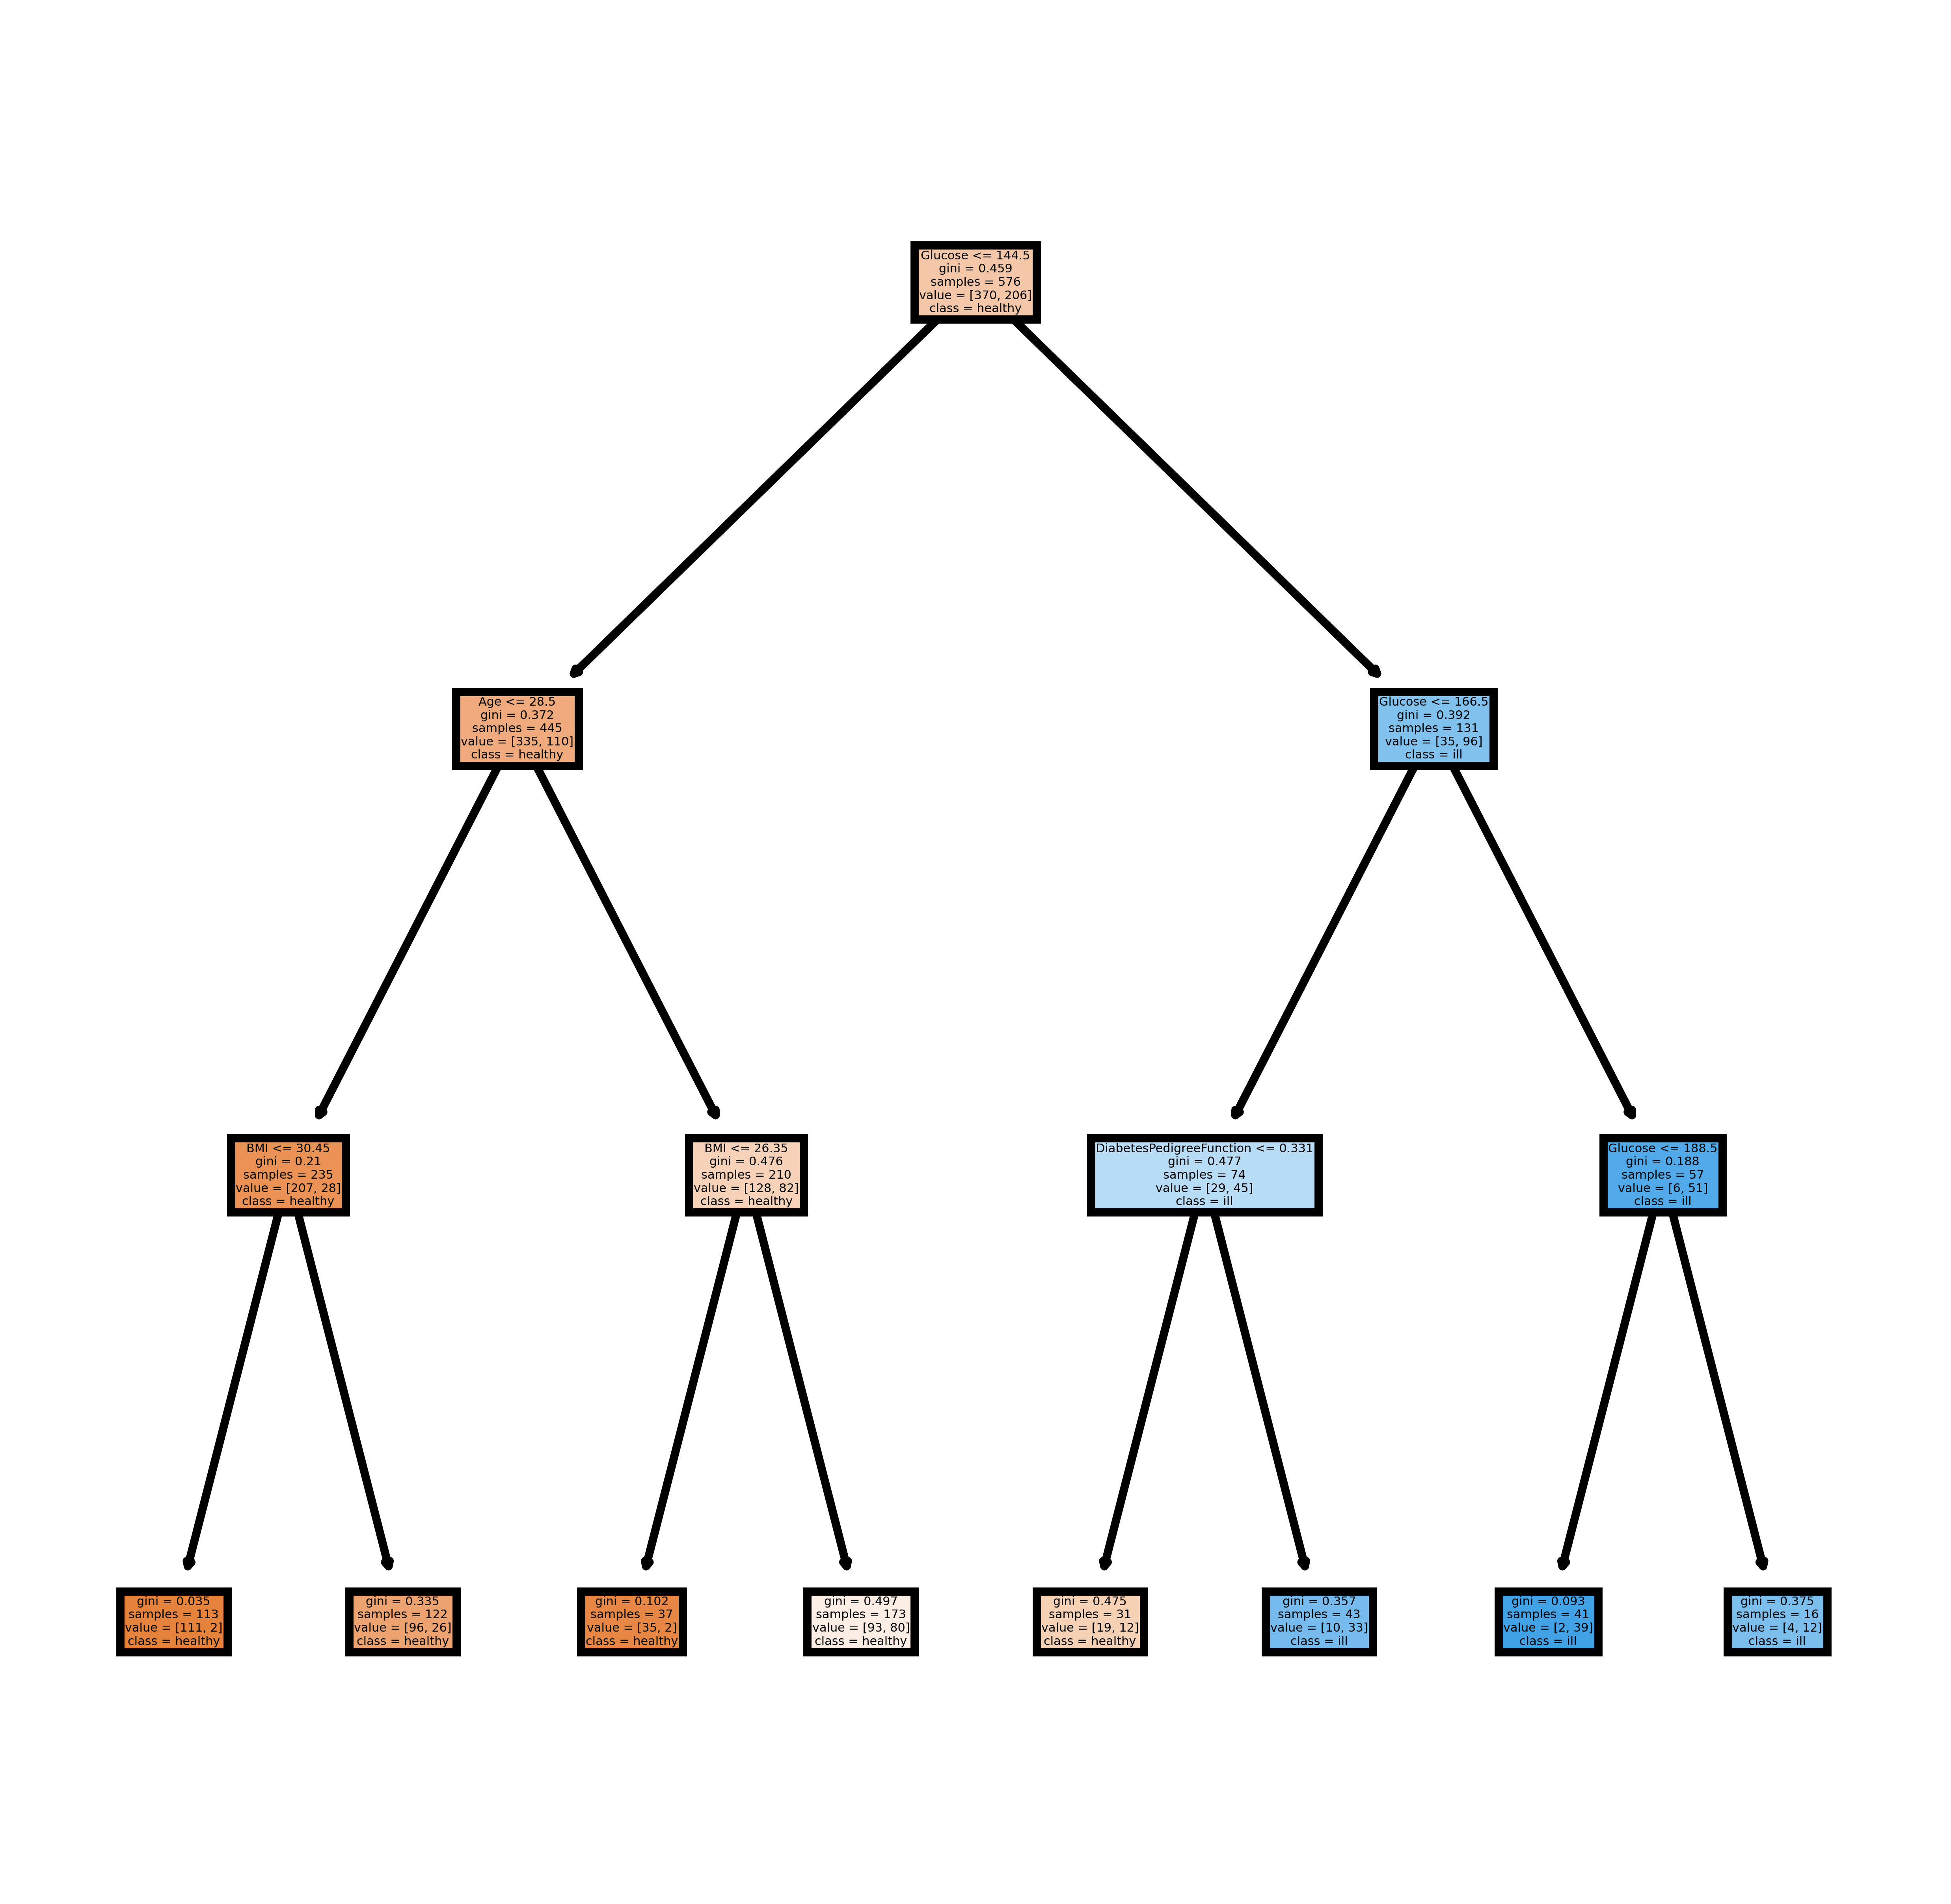

In [36]:
import matplotlib.pyplot as plt
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
fn=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cn=['healthy','ill']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1500)
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
fig.savefig('imagename.png')

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

cn = confusion_matrix(Y_test, clf.predict(X_test))
print(cn)
print('Acc=', accuracy_score(Y_test, clf.predict(X_test)))
print('Pre=', precision_score(Y_test, clf.predict(X_test)))
print('Recall=', recall_score(Y_test, clf.predict(X_test)))
print('f1=', confusion_matrix(Y_test, clf.predict(X_test)))

[[119  11]
 [ 40  22]]
Acc= 0.734375
Pre= 0.6666666666666666
Recall= 0.3548387096774194
f1= [[119  11]
 [ 40  22]]
